In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

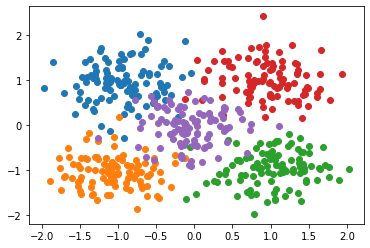

In [2]:
n_pts = 500
centers = [[-1, 1], [-1,-1], [1, -1], [1, 1], [0, 0]]
X, Y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)

plt.figure()
plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
plt.scatter(X[Y == 2, 0], X[Y == 2, 1])
plt.scatter(X[Y == 3, 0], X[Y == 3, 1])
plt.scatter(X[Y == 4, 0], X[Y == 4, 1])

plt.show()

In [3]:
# Needs to one-hot encode our labels

print(Y)

y_cat = to_categorical(Y, 5)

print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

In [4]:
model = Sequential()
model.add(Dense(units = 5, input_shape = (2,), activation = 'softmax'))

model.compile(Adam(0.1), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs = 100)

Epoch 1/100
10/10 [==============================] - 3s 10ms/step - loss: 0.9951 - accuracy: 0.6760
Epoch 2/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5369 - accuracy: 0.8540
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3752 - accuracy: 0.9120
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3077 - accuracy: 0.9520
Epoch 5/100
10/10 [==============================] - 0s 26ms/step - loss: 0.2687 - accuracy: 0.9500
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.2469 - accuracy: 0.9420
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.2340 - accuracy: 0.9420
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9460
Epoch 9/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2110 - accuracy: 0.9460
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2037 - accuracy: 0.9480
Ep

In [6]:
def plot_decision_boundary(X, y_cat, model):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25, 50)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25, 50)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  # pred_func = model.predict_classes(grid) # Outdated function
  pred_func = np.argmax(model.predict(grid), axis=-1)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)

79/79 [==============================] - 0s 2ms/step


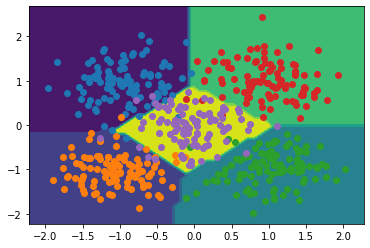

In [7]:
plot_decision_boundary(X, y_cat, model)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1])
plt.scatter(X[Y == 1, 0], X[Y == 1, 1])
plt.scatter(X[Y == 2, 0], X[Y == 2, 1])
plt.scatter(X[Y == 3, 0], X[Y == 3, 1])
plt.scatter(X[Y == 4, 0], X[Y == 4, 1])
plt.show()

# Section 10 MNIST Image Recognition

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random


In [9]:
np.random.seed(0)


In [10]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [12]:
assert(X_train.shape[0] == Y_train.shape[0]), 'Num images not same'

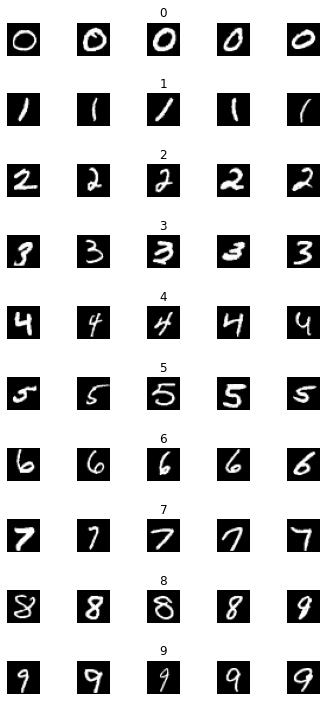

In [13]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_selected = X_train[Y_train == j] # Takes images with label j
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


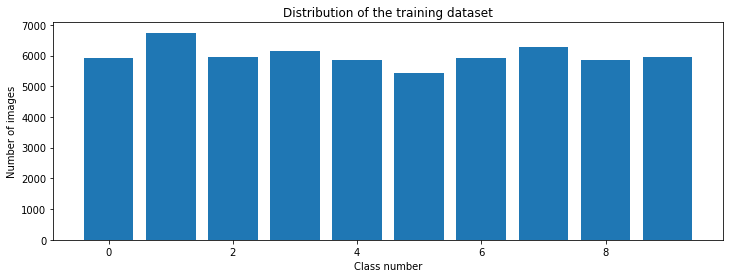

In [14]:
print(num_of_samples)

plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [15]:
# Time to pre-process the data

# One-hot encode it

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

# Normalize the data, each pixel has intensity between 0 - 255. Divide by 255 to make the range 0 - 1 instead.
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# Flatten our inputs images to one dimension instead of 2. 
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [17]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [18]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [19]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=10, batch_size = 200, verbose = 1, shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.5240 - accuracy: 0.8409 - val_loss: 0.2654 - val_accuracy: 0.9227
Epoch 2/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2906 - accuracy: 0.9153 - val_loss: 0.2174 - val_accuracy: 0.9367
Epoch 3/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2492 - accuracy: 0.9287 - val_loss: 0.1880 - val_accuracy: 0.9425
Epoch 4/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2275 - accuracy: 0.9339 - val_loss: 0.1955 - val_accuracy: 0.9408
Epoch 5/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2163 - accuracy: 0.9372 - val_loss: 0.1860 - val_accuracy: 0.9465
Epoch 6/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2098 - accuracy: 0.9391 - val_loss: 0.1870 - val_accuracy: 0.9427
Epoch 7/10
270/270 [==============================] - 1s 4ms/step - loss: 0.2044 - accuracy: 0.9404 - val_loss: 0.1768 - val_accuracy: 0.9503
Epoch 

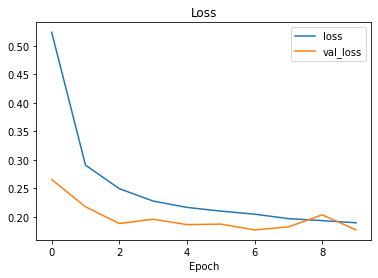

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()


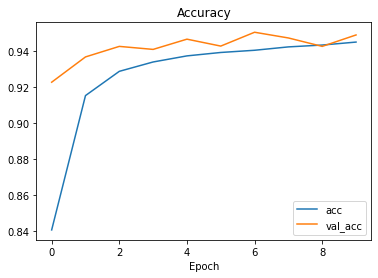

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.show()


In [22]:
# Needed for upcoming video: 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

import requests

from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'

response = requests.get(url, stream=True)

img = Image.open(response.raw)

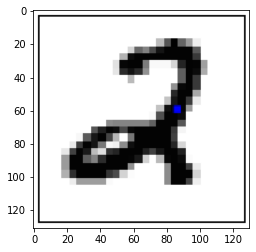

In [23]:
plt.imshow(img)
plt.show()

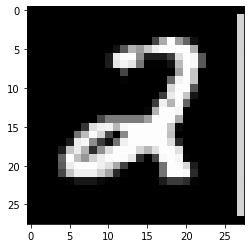

In [24]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap("gray"))
plt.show()

In [25]:
image = image / 255
image = image.reshape(1, 784)



In [26]:
prediction = model.predict(image) 
predicted_class = np.argmax(prediction,axis=1)
print("predictied digit: ", str(predicted_class))

1/1 [==============================] - 0s 60ms/step
predictied digit:  [2]
